# Analysis on Railway defects identified during 2010-2012

In [1]:
from matplotlib import cm
from matplotlib import pyplot as plt
from collections import Counter
from tabulate import tabulate

import os
import numpy as np
import pandas as pd
import datetime as dt

_DATA_SOURCE_PATH = "/users/suryak/courses/bigdata-class/project"

def load_rail_data():
    # Load rail defects data
    filename = os.path.join(_DATA_SOURCE_PATH, "rail_defects.csv")
    columns = [
        "division", "sub_division", "prefix", "milepost", "track_type", "track_code", 
        "side", "defect_type", "size", "date_found", "car_name", "prepared_by", 
        "curve_tang", "road_master", "joint_weld", "rolled_year", "mill", "weight",
        "mgt", "age", "cum_mgt"]
    column_types = [
        str, str, str, float, str, str, str, str, float, dt.date, str, str, str, str, str,
        float, str, float, float, float, float]
    dtype = dict([(c, t) for c, t in zip(columns, column_types)])
    rail_data = pd.read_csv(filename, names=columns, dtype=dtype, parse_dates=True, header=0)
    return rail_data

# Load the data
df = load_rail_data()

# Set matplotlib style
plt.xkcd()


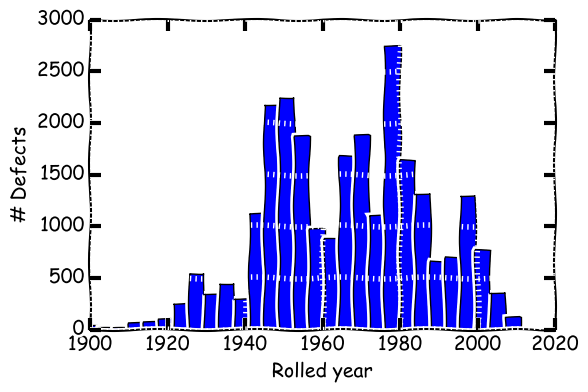

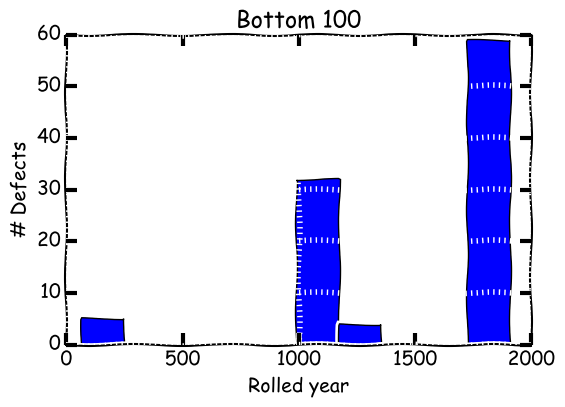

Rolled Year: Year at which rail section was installed
Mean:  1964.58743127
Variance:  2190.67512411
Standard Deviation:  46.804648531
Max Value:  2011.0
Min Value:  66.0
Unknow Values:  606


In [2]:
# Rolled year: Year in which rail sections were installed

fig, ax = plt.subplots()
rolled_year = df.rolled_year.dropna().sort_values()
rolled_year.hist(ax=ax, bins=500)
ax.set_xlim(1900, 2020)
ax.set_xlabel("Rolled year")
ax.set_ylabel("# Defects")
plt.show()

# Bottom 100 - Rolled Year
fig, ax = plt.subplots()
bottom_rolled_year = rolled_year[:100]
bottom_rolled_year.hist(ax=ax)
ax.set_xlabel("Rolled year")
ax.set_ylabel("# Defects")
ax.set_title("Bottom 100")
plt.show()

print "Rolled Year: Year at which rail section was installed" 
print "====================================================="
print "Mean: ", rolled_year.mean()
print "Variance: ", rolled_year.var()
print "Standard Deviation: ", rolled_year.std()
print "Max Value: ", rolled_year.max()
print "Min Value: ", rolled_year.min()
print "Unknow Values: ", len(df.rolled_year) - rolled_year.count()


# Sections installed during 1950-60s have more defects; with the exception of 1950-60's. Perhaps, they are too old?

# The recent ones between 1990 - 2012 also have many defects which we perhaps are more interested in..

## Defects were tracked down during 2010 - 2012

- **Outliers on the left side of histogram should be addressed**.

- **Around 600 records are identified with unknown values.**


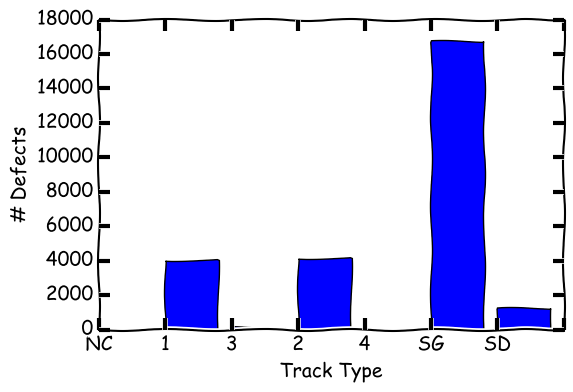

/Users/suryak/anaconda/lib/python2.7/site-packages/pandas/indexes/multi.py:610: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_value(s, k)


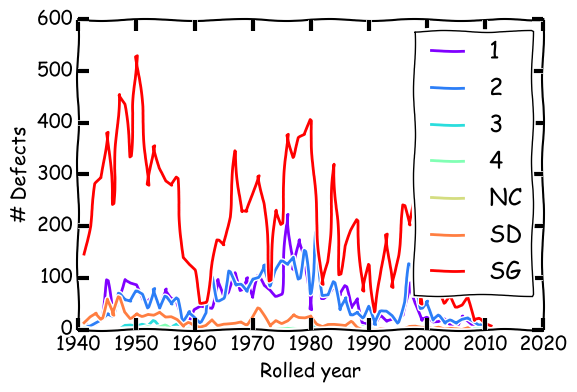

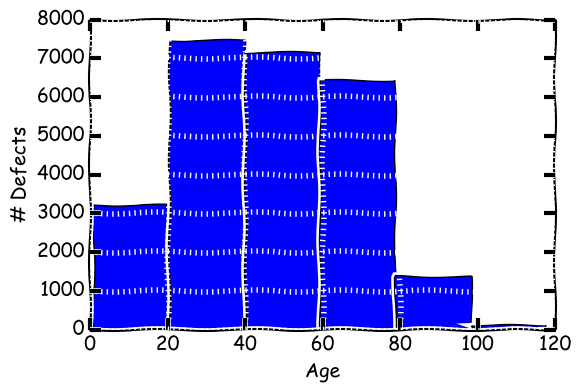

Age 
Mean:  47.6976302951
Variance:  2192.527388
Standard Deviation:  46.8244315288
Max Value:  1946.0
Min Value:  1.0
Missing Values:  606


In [3]:
# Plot 1
tracks = Counter(df.track_type.dropna())
fig, ax = plt.subplots()
ax.bar(range(len(tracks)), tracks.values(), color="blue")
ax.set_xticklabels(tracks.keys())
ax.set_xlabel("Track Type")
ax.set_ylabel("# Defects")
plt.show()

# Plot 2
grouped_data = df.groupby(["rolled_year", "track_type"])["track_type"].count()
dim_levels = grouped_data.keys().levels
years = [y for y in dim_levels[0] if y > 1940]
tracks = dim_levels[1]
colors = cm.rainbow(np.linspace(0, 1, len(tracks)))

fig, ax = plt.subplots()
for color, t in zip(colors, tracks):
    ax.plot(years, [grouped_data[yr].get(t, 0) for yr in years], color=color, label=t)
ax.legend()
ax.set_xlabel("Rolled year")
ax.set_ylabel("# Defects")
plt.show()

# Plot 3
fig, ax = plt.subplots()
age = df.age.dropna().sort_values()
age.hist(ax=ax, bins=100)
ax.set_xlim(0, 120)
ax.set_xlabel("Age")
ax.set_ylabel("# Defects")
plt.show()

print "Age \n==================="
print "Mean: ", df.age.mean()
print "Variance: ", df.age.var()
print "Standard Deviation: ", df.age.std()
print "Max Value: ", df.age.max()
print "Min Value: ", df.age.min()
print "Missing Values: ", len(df.age) - age.count()



# Sections with SG track have most defects. Because SG is used more than others? (need to remove bias)

# There was a slight increase in defects in 1 & 2 tracks between 1970-90's

# Sections of 80-90 age have less defects. Because most of 80-90s were already replaced with new ones?

- Average age of a section with defect: ~47 years

- **Outliers: 1946. This number might effect the mean..**

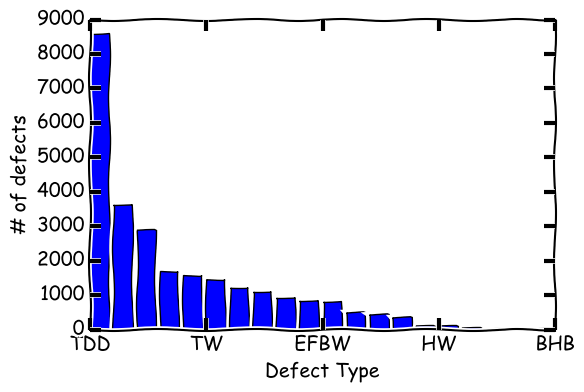

In [4]:
# Defect Type: Defects in rail sections

defects = Counter(df.defect_type.dropna())
sorted_defects = sorted(defects, key=defects.get, reverse=True)

fig, ax = plt.subplots()
ax.bar(range(len(sorted_defects)), [defects[i] for i in sorted_defects], color="blue")
ax.set_xlabel("Defect Type")
ax.set_ylabel("# of defects")
ax.set_xticklabels(sorted_defects)
plt.show()


# Most common defects

In [5]:
table = [ [count+1, d, defects[d]] for count, d in enumerate(sorted_defects) if count < 8]
headers = ["#", "Defect", "Count"]
print tabulate(table, headers=headers, tablefmt="grid")

+-----+----------+---------+
|   # | Defect   |   Count |
+=====+==========+=========+
|   1 | TDD      |    8594 |
+-----+----------+---------+
|   2 | TW       |    3642 |
+-----+----------+---------+
|   3 | EFBW     |    2883 |
+-----+----------+---------+
|   4 | HW       |    1691 |
+-----+----------+---------+
|   5 | BHB      |    1579 |
+-----+----------+---------+
|   6 | SD       |    1478 |
+-----+----------+---------+
|   7 | VSH      |    1230 |
+-----+----------+---------+
|   8 | HSH      |    1128 |
+-----+----------+---------+


# Least common defects

In [6]:
bottom_sorted_defects = sorted(defects, key=defects.get)
table = [ [count+1, d, defects[d]] for count, d in enumerate(bottom_sorted_defects) if count < 5]
print tabulate(table, headers=headers, tablefmt="grid")

+-----+----------+---------+
|   # | Defect   |   Count |
+=====+==========+=========+
|   1 | HWJ      |       4 |
+-----+----------+---------+
|   2 | PIPE     |       5 |
+-----+----------+---------+
|   3 | TD       |       8 |
+-----+----------+---------+
|   4 | DR       |      33 |
+-----+----------+---------+
|   5 | TDC      |      98 |
+-----+----------+---------+


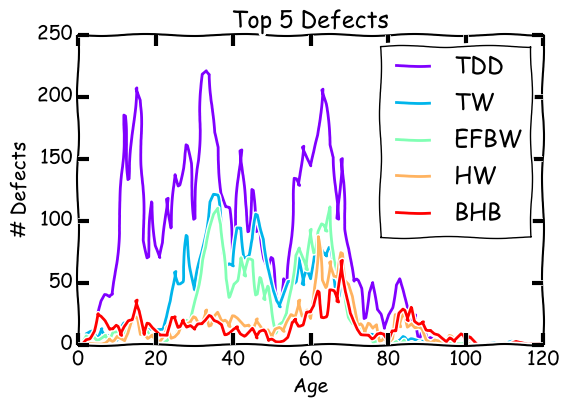

In [7]:
grouped_data = df.groupby(["age", "defect_type"])["defect_type"].count()
dim_levels = grouped_data.keys().levels
ages = dim_levels[0]
defects = [d for c, d in enumerate(sorted_defects) if c < 5]
colors = cm.rainbow(np.linspace(0, 1, len(defects)))

fig, ax = plt.subplots()
for color, d in zip(colors, defects):
    ax.plot(ages, [grouped_data[a].get(d, 0) for a in ages], color=color, label=d)
ax.legend(loc="best")
ax.set_xlabel("Age")
ax.set_ylabel("# Defects")
ax.set_title("Top 5 Defects")
ax.set_xlim(0, 120)
plt.show()

# Periods between 40-60 and 60-80 are interesting. There is a slight change in the characteristics. 

## 40-60: TW is more common than TDD
## 60-80: HW is more common than TW; EFBW is more common than TW

*Need to remove bias*

--------------------


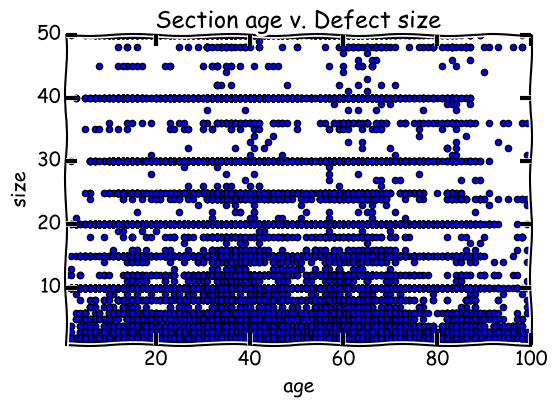

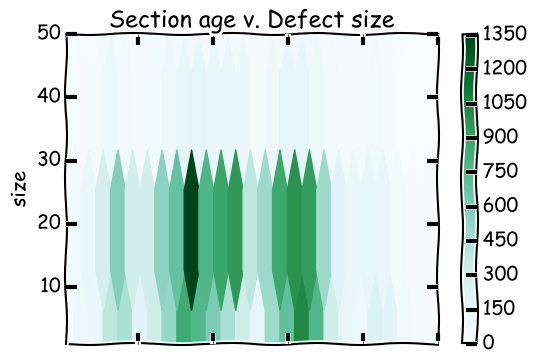

In [8]:
# Consider data with *age* < 100. Anything above that seem to look like error..
from mpl_toolkits.mplot3d import Axes3D

# Filter tail values
df_fil  = df[(df.age < 100) & (df["size"] < 700)]

# How to plot a 3D surface??

ax = df_fil.plot.scatter(x="age", y="size")
ax.set_xlim(1, 100)
ax.set_ylim(1, 50)
ax.set_title("Section age v. Defect size")
plt.show()

ax = df_fil.plot.hexbin(x="age", y="size", gridsize=25)
ax.set_xlim(1, 100)
ax.set_ylim(1, 50)
ax.set_title("Section age v. Defect size")
plt.show()



# Most defects with size 10-30 are observed in rail sections having 30-50 age

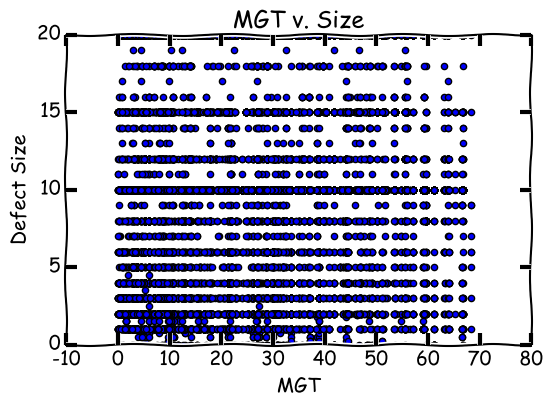

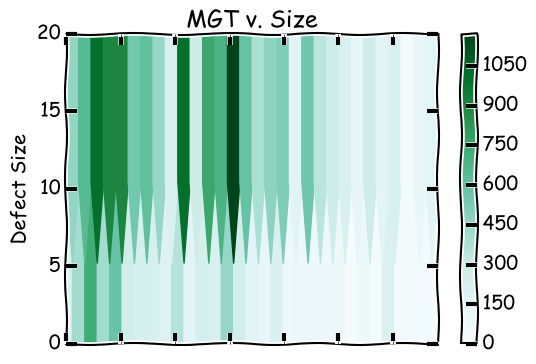

In [9]:
# Ignore extreme values
df_filtered = df[ (df["size"] < 700) & df.mgt.notnull() ]
defects = df_filtered["defect_type"].unique()

ax = df_filtered.plot.scatter(x="mgt", y="size")
ax.set_ylim(0, 20)
ax.set_xlabel("MGT")
ax.set_ylabel("Defect Size")
ax.set_title("MGT v. Size")
plt.show()

ax = df_filtered.plot.hexbin(x="mgt", y="size", gridsize=30)
ax.set_ylim(0, 20)
ax.set_xlabel("MGT")
ax.set_ylabel("Defect Size")
ax.set_title("MGT v. Size")
plt.show()


# Classification of Defect Types

In [76]:
#
# Ref:
# a) http://scikit-learn.org/stable/modules/model_evaluation.html
# b) http://scikit-learn.org/stable/auto_examples/calibration/plot_compare_calibration.html
#

def fit_classifiers(train_data, clf_class_list):
    """Fit a bunch of classifiers with training data."""
    clf_list = []
    for clf_class, clf_kw in clf_class_list:
        clf = clf_class(**clf_kw)
        clf.fit(train_data[0], train_data[1])
        clf_list.append(clf)
    return clf_list

def test_classifiers(test_data, clf_list, display=True):
    """Test a bunch of classifiers with test data."""
    scores = []
    for clf in clf_list:
        if hasattr(clf, "score"):
            scr = clf.score(test_data[0], test_data[1])
            scores.append(scr)
        else:
            y_pred = clf.predict(test_data[0])
            scr = 1 - (((test_data[1] != y_pred).sum() * 1.0) / test_data[0].shape[0])
            scores.append(scr)
        if display:
            print "{0}: {1}".format(clf.__name__, scr)
    return scores

def train_and_test(train_data, test_data, clf_class, kw={}, display=False):
    """Train and test a classifier."""
    # Train
    clf = clf_class(**kw)
    clf.fit(*train_data)
    y_pred = clf.predict(test_data[0])
    
    # Test
    if hasattr(clf, "score"):
        scr = clf.score(*test_data)
    else:
        y_pred = clf.predict(test_data[0])
        scr = 1 - (((test_data[1] != y_pred).sum() * 1.0) / test_data[0].shape[0])
    if display:
        print "{0} score: {1}".format(clf_class.__name__, scr)
    
    return clf, scr

def normalize(df, label):
    """Normalize a numerical column."""
    lmax = df[label].max()
    lmin = df[label].min()
    df[label] = df[label].apply(lambda x : (x - lmin) / (lmax - lmin))
    return df;

def str_to_int(df, label):
    """Get integer values for a column of strings."""
    vmap = {}
    count = 0;
    for v in df[label].unique():
        if pd.isnull(v):
            continue
        vmap[v] = count;
        count += 1
    return df[label].replace(vmap)


from sklearn.calibration import calibration_curve
from matplotlib.font_manager import FontProperties


def tabulate_scores(clf_score_list):
    headers = ["#", "ML Model", "Score"]
    records = [ [c+1, d[0].__name__, d[1]] for c, d in enumerate(clf_score_list) ]
    print tabulate(records, headers=headers, tablefmt="grid")


def plot_reliability_histogram(x_test, clf_list):
    """
    ref: http://scikit-learn.org/stable/auto_examples/calibration/plot_compare_calibration.html
    """
    fig = plt.figure(figsize=(10, 10))
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    
    for name, clf in clf_list:
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(x_test)[:, 1]
        else:
            prob_pos = clf.decision_function(x_test)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name, histtype="step", lw=2)

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("# Outcomes")
    
    prop = FontProperties()
    prop.set_size('small')
    ax2.legend(loc="upper center", ncol=2, prop=prop)
    plt.tight_layout()
    plt.show()


In [69]:
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Model the classifiers
# (classifier class name, keyword arguments to be passed)
clf_class_list = [
    (svm.SVC, {}),
    (tree.DecisionTreeClassifier, {}),
    (RandomForestClassifier, {"n_estimators": 10}),
    (BaggingClassifier, {"base_estimator": KNeighborsClassifier(), "max_samples": 0.5, "max_features": 0.5}),
    (MLPClassifier, {"solver": 'lbfgs', "alpha": 1e-5, "hidden_layer_sizes": (5, 2), "random_state": 1}),
]

# Get classifier objects
# NOTE: This is not used...
# clf_list = fit_classifiers((x_train, y_train), clf_class_list)

# Preprocessing

In [70]:
from sklearn.model_selection import train_test_split

def get_df_clf(df):
    """Preprocess the original dataframe and return a copy."""
    # Work on a copy..
    df_clf = df.copy()

    # Joint-weld: replace empty values with NaN
    df_clf[df_clf.joint_weld.eq(" ")] = np.nan

    # Replace strings with integers.. for classification
    df_clf["side"] = str_to_int(df_clf, "side")
    df_clf["joint_weld"] = str_to_int(df_clf, "joint_weld")
    df_clf["track_type"] = str_to_int(df_clf, "track_type")
    df_clf["curve_tang"] = str_to_int(df_clf, "curve_tang")
    
    return df_clf
    

## Subset (all)

**Features: size, weight, MGT, age, track type, curve tang**

2) Entire dataset except records with empty values in feature columns

3) Extreme values are filtered (on all subsets)

+-----+------------------------+----------+
|   # | ML Model               |    Score |
+=====+========================+==========+
|   1 | SVC                    | 0.646605 |
+-----+------------------------+----------+
|   2 | DecisionTreeClassifier | 0.425295 |
+-----+------------------------+----------+
|   3 | RandomForestClassifier | 0.461769 |
+-----+------------------------+----------+
|   4 | BaggingClassifier      | 0.502352 |
+-----+------------------------+----------+
|   5 | MLPClassifier          | 0.394005 |
+-----+------------------------+----------+


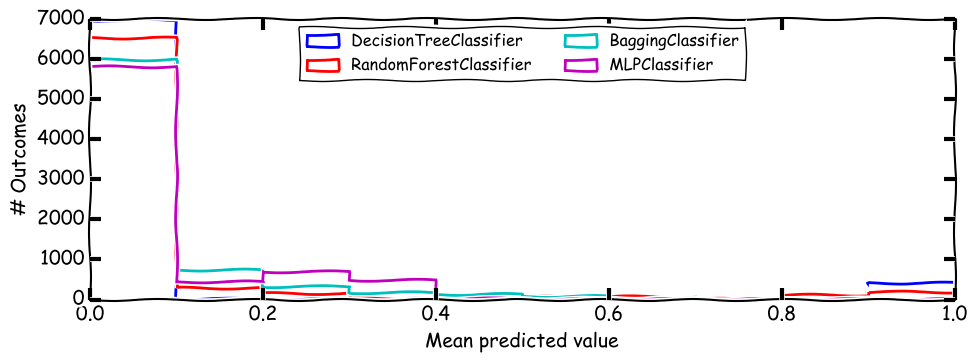

In [82]:
# Features and labels to perform classification
features = ["size", "weight", "mgt", "age", "track_type", "curve_tang"]
labels = ["defect_type"]

# Create a copy of df (data frame)
df_clf = get_df_clf(df)

# Ignore empty values
df_clf = df_clf.dropna(subset=features + labels)

# Filter extreme values
df_clf = df_clf[(df_clf["size"] < 1000) & (df_clf["age"]) < 100]

# Labels..
df_labels = np.ravel(df_clf[labels].values)
df_features = df_clf[features].values

# Split the data for training and testing..
x_train, x_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=42)

# SVC classification
svm_clf, score = train_and_test((x_train, y_train), (x_test, y_test), svm.SVC)

# Decision Tree
dt_clf, dt_score = train_and_test((x_test, y_test), (x_train, y_train), tree.DecisionTreeClassifier, kw=)

# Random Forest
rf_clf, rf_score = train_and_test((x_test, y_test), (x_train, y_train), RandomForestClassifier, kw={
        "n_estimators": 10})

# Bagging Classifier
bc_clf, bc_score = train_and_test((x_train, y_train), (x_test, y_test), BaggingClassifier, kw={
        "base_estimator": KNeighborsClassifier(), "max_samples": 0.5, "max_features": 0.5},)

# MLP
mlp_clf, mlp_score = train_and_test((x_train, y_train), (x_test, y_test), MLPClassifier, kw={
        "solver": 'lbfgs', "alpha": 1e-5, "hidden_layer_sizes": (5, 2), "random_state": 1})

tabulate_scores([
    (svm.SVC, svm_score),
    (tree.DecisionTreeClassifier, dt_score),
    (RandomForestClassifier, rf_score),
    (BaggingClassifier, bc_score),
    (MLPClassifier, mlp_score)
])

# Plot the histogram
plot_reliability_histogram(x_test, [
    #(svm.SVC.__name__, svm_clf),
    (tree.DecisionTreeClassifier.__name__, dt_clf),
    (RandomForestClassifier.__name__, rf_clf),
    (BaggingClassifier.__name__, bc_clf),
    (MLPClassifier.__name__, mlp_clf) 
])


# Subset (all)

**Features: size, MGT, joint weld**

+-----+------------------------+----------+
|   # | ML Model               |    Score |
+=====+========================+==========+
|   1 | SVC                    | 0.646605 |
+-----+------------------------+----------+
|   2 | DecisionTreeClassifier | 0.613757 |
+-----+------------------------+----------+
|   3 | RandomForestClassifier | 0.612434 |
+-----+------------------------+----------+
|   4 | BaggingClassifier      | 0.612654 |
+-----+------------------------+----------+
|   5 | MLPClassifier          | 0.594136 |
+-----+------------------------+----------+


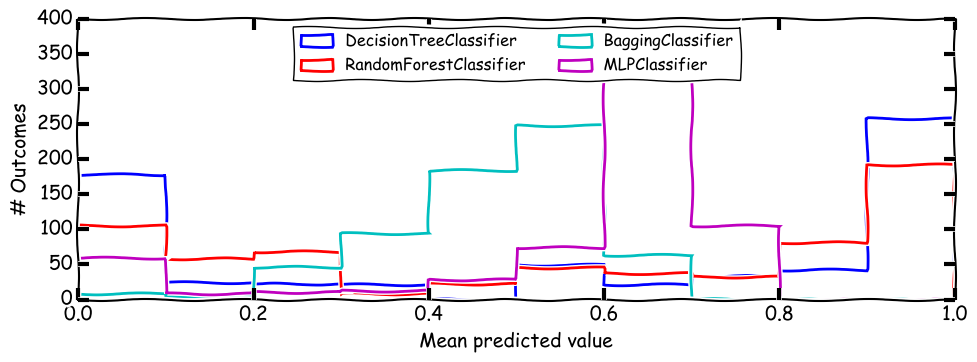

In [83]:
# Features and labels to perform classification
features = ["size", "mgt", "joint_weld"]
labels = ["defect_type"]

# Get the data frame (preprocessed)
df_clf = get_df_clf(df)

# Ignore empty values
df_clf = df_clf.dropna(subset=features + labels)

# Filter extreme values
df_clf = df_clf[(df_clf["size"] < 1000)]

# Labels..
df_labels = np.ravel(df_clf[labels].values)
df_features = df_clf[features].values

# Split the data for training and testing..
x_train, x_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=42)

# SVC classification
svm_clf, score = train_and_test((x_train, y_train), (x_test, y_test), svm.SVC)

# Decision Tree
dt_clf, dt_score = train_and_test((x_test, y_test), (x_train, y_train), tree.DecisionTreeClassifier)

# Random Forest
rf_clf, rf_score = train_and_test((x_test, y_test), (x_train, y_train), RandomForestClassifier, kw={
        "n_estimators": 10})

# Bagging Classifier
bc_clf, bc_score = train_and_test((x_train, y_train), (x_test, y_test), BaggingClassifier, kw={
        "base_estimator": KNeighborsClassifier(), "max_samples": 0.5, "max_features": 0.5},)

# MLP
mlp_clf, mlp_score = train_and_test((x_train, y_train), (x_test, y_test), MLPClassifier, kw={
        "solver": 'lbfgs', "alpha": 1e-5, "hidden_layer_sizes": (5, 2), "random_state": 1})

tabulate_scores([
    (svm.SVC, svm_score),
    (tree.DecisionTreeClassifier, dt_score),
    (RandomForestClassifier, rf_score),
    (BaggingClassifier, bc_score),
    (MLPClassifier, mlp_score)
])

# Plot the histogram
plot_reliability_histogram(x_test, [
    #(svm.SVC.__name__, svm_clf),
    (tree.DecisionTreeClassifier.__name__, dt_clf),
    (RandomForestClassifier.__name__, rf_clf),
    (BaggingClassifier.__name__, bc_clf),
    (MLPClassifier.__name__, mlp_clf) 
])


In [123]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(clf, x_test, y_test, class_names, title='Confusion matrix'):
    y_pred = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



# Subset (per division)

Decision Tree Classifier
+------------+----------+
| Division   |    Score |
+============+==========+
| AP         | 0.482077 |
+------------+----------+
| AT         | 0.436545 |
+------------+----------+
| AY         | 0.412069 |
+------------+----------+
| BA         | 0.53047  |
+------------+----------+
| CG         | 0.378465 |
+------------+----------+
| FL         | 0.426371 |
+------------+----------+
| GL         | 0.3825   |
+------------+----------+
| HU         | 0.4987   |
+------------+----------+
| JX         | 0.387866 |
+------------+----------+
| LO         | 0.318345 |
+------------+----------+
| NS         | 0.369298 |
+------------+----------+


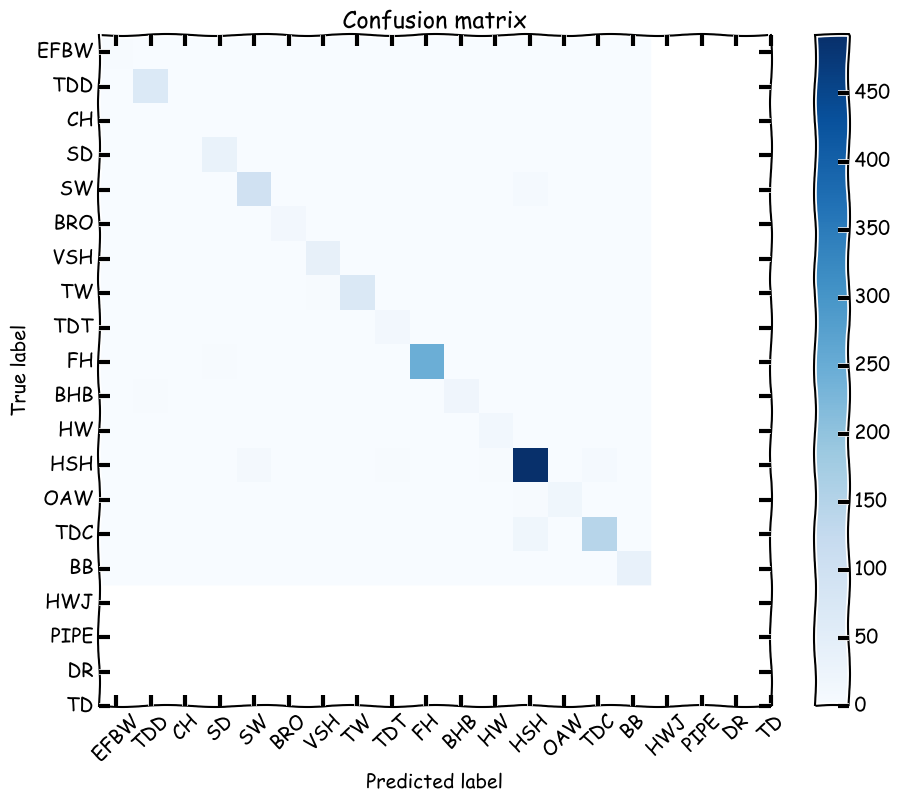

In [124]:
# Features and labels to perform classification
features = ["size", "weight", "mgt", "age"]
labels = ["defect_type"]

df_clf = get_df_clf(df)

# Ignore empty values
df_clf = df_clf.dropna(subset=features + labels)

# Filter extreme values
df_clf = df_clf[(df_clf["size"] < 1000) & (df_clf["age"]) < 100]

def run_per_division(div, df_clf):
    df_clf = df_clf[df_clf["division"] == div]
    
    # Labels..
    df_labels = np.ravel(df_clf[labels].values)
    df_features = df_clf[features].values

    # Split the data for training and testing..
    x_train, x_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=42)

    # Decision Tree
    clf, score = train_and_test((x_test, y_test), (x_train, y_train), tree.DecisionTreeClassifier)
    return score

scores = []
for d in df_clf.division.unique():
    scr = run_per_division(d, df_clf.copy())
    scores.append([d, scr])

print "Decision Tree Classifier"
print tabulate(scores, headers=["Division", "Score"], tablefmt="grid")

#
# Plot confusion matrix for Decision Tree
#

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=42)

# Train the classifier (use train_and_test defined above)
clf, score = train_and_test((x_test, y_test), (x_train, y_train), tree.DecisionTreeClassifier)

# Plot the data
plot_confusion_matrix(clf, x_test, y_test, df_clf.defect_type.unique())

# Subsets (per sub-division)

In [167]:
# Features and labels to perform classification
features = ["size", "weight", "mgt", "age"]
labels = ["defect_type"]

df_clf = get_df_clf(df)

# Ignore empty values
df_clf = df_clf.dropna(subset=features + labels)

# Filter extreme values
df_clf = df_clf[(df_clf["size"] < 1000) & (df_clf["age"]) < 100]

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')


# Number of records for each divison & sub-division.
# df_clf = df_clf.groupby(["division", "sub_division"]).filter(lambda x : len(x) >= 700)
# print df_clf.count()
# print_full(df_clf)
#
# print df_clf.division.unique()
# print df_clf.sub_division.unique()

def run_per_sub_division(df_clf, div, sub_div):
    df_clf = df_clf[(df_clf.division == div) & (df_clf.sub_division == sub_div)]
    
    # Labels..
    df_labels = np.ravel(df_clf[labels].values)
    df_features = df_clf[features].values

    # Split the data for training and testing..
    x_train, x_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=42)

    # Decision Tree
    clf, score = train_and_test((x_test, y_test), (x_train, y_train), tree.DecisionTreeClassifier)
    return score


print "Division: AP, Sub-Division: CUMBERLAND VALLEY"
print "Decision Tree: ", run_per_sub_division(df_clf, "AP", "CUMBERLAND VALLEY")
print "Decision Tree: ", run_per_sub_division(df_clf, "AP", "BIG SANDY")


 Division: AP, Sub-Division: CUMBERLAND VALLEY
Decision Tree:  0.451417004049
Decision Tree:  0.559020044543
